# (C) Scattering case

In [1]:
# This cell runs the file "Orbital_functions_n.ipynb" such that the functions in that file can be utillized here
%run ./Orbital_functions_n.ipynb

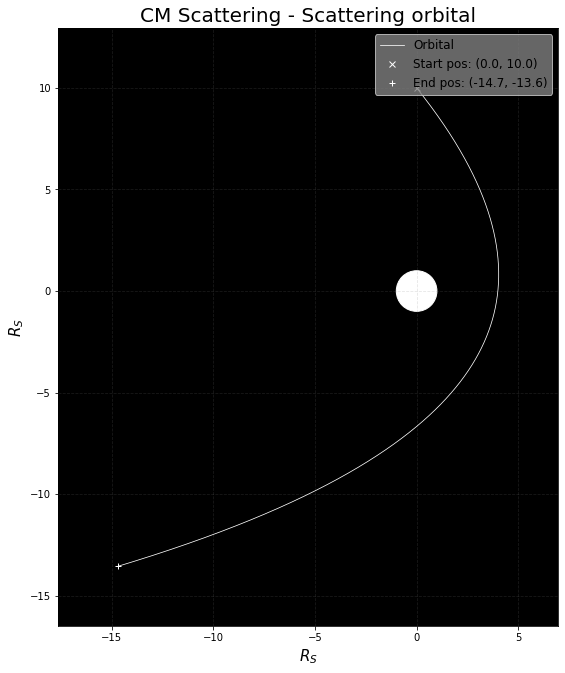

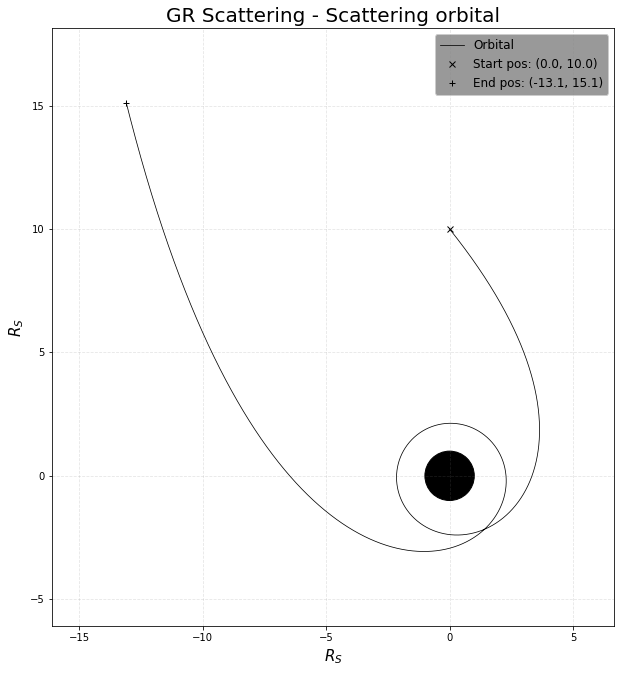

In [2]:
s1 = [0,10,0.2,-0.25]
pos1 = orbitals(s1, GR = False, dt=0.01)[0]
orbPlot1 = orbPlotter(pos1,'CM Scattering - Scattering orbital')

s2 = [0,10,0.2,-0.25]
pos2 = orbitals(s2, GR = True, dt=0.01)[0]
orbPlot2 = orbPlotter(pos2,'GR Scattering - Scattering orbital', GR = True)

## Checking the scattering angle
To find the scattering angle analytically in our variables we do the following:

(5.14 from analmech book)

$$\bar \gamma = G(m + M) \approx M = \tfrac{1}{2} R_S$$

$$\cot {\tfrac{1}{2} \theta} = \frac{v_\infty^2 b}{\bar \gamma}$$
$$\longrightarrow \qquad \theta = 2 \, \mathrm{arctan\,} \left[\frac{\bar \gamma}{v_\infty^2 b}\right] \qquad \text{in our variables} \qquad \theta = 2 \, \mathrm{arctan\,} \left[\frac{1}{2 P_\infty^2 \beta}\right].$$

Now, to find the scattering angle from our numerical solution, we take the end position and scoot it over by $\beta$ to have it relative to the origin. Then we use basic trigonometry to calculate the scattering angle.

Right underneath here we check the difference of the analytical and numerical scattering angle for a range of different energies between 0 and 1.

In [21]:
# Defining parameters
α = -1000
β = 10
κ = 1
ρ = np.sqrt(α**2 + β**2)

θ_as = []
θ_cs = []
δs = []

for E in np.linspace(0.01,1,10):
    # Finding momentum from energy
    P = findPinf(E, α, β, κ)

    # Calculating orbitals
    s = [α,β,P,0]
    tmax = 10000
    pos = orbitals(s, GR = False, t_max = tmax,dt=1)[0]
    orbPlot = orbPlotter(pos,f'CM Scattering - E = {E:.2f}', show = False)
    

    #Extracting end position and translating with β
    end_pos = [pos[0][-1], pos[1][-1] - β]

    # Calculating θ analytically
    θ_anal = 2*np.arctan(1/(2*P**2*β))
    θ_anal = np.abs(θ_anal)
    θ_as.append(θ_anal)

    # Calculating θ from numerical solution
    θ_code = np.arctan2(end_pos[1],end_pos[0])
    θ_code = np.abs(θ_code)
    θ_cs.append(θ_code)

    # Calculating difference between numerical and analytical methods
    δ = θ_code - θ_anal
    δs.append(round(δ,6))

print(f'The angle difference for each case is {δs}')

The angle difference for each case is [-0.029993, 0.00036, 9.2e-05, 3.8e-05, 1.9e-05, 1.1e-05, 6e-06, 4e-06, 2e-06, 1e-06]


In [9]:
# α = -1000
# β = 1
# κ = 1

# ρ = sqrt(α**2 + β**2)


# E = 17
# P = findPinf(E, α, β, κ)

# tmax = 1000000

# s = [α, β, P, 0]
# pos = orbitals(s, GR = False, Tmax = tmax, resolution = round(0.01*tmax), RS = 1, d=3)[0]
# orbPlot = orbPlotter(pos,f'CM test')
# # prettyOrbPlot = prettyOrbPlotter(pos,'CM test')
# pos = orbitals(s, GR = True, Tmax = tmax, resolution = round(0.01*tmax), RS = 1, d=3)[0]
# orbPlot = orbPlotter(pos,f'GR test', GR = True)
# # prettyOrbPlot = prettyOrbPlotter(pos,'GR test')

In [6]:
# α = -1000
# β = 1000
# κ = 1

# ρ = sqrt(α**2 + β**2)

# E = -κ/ρ


# for i in range(0,10):
#     E = E+i/40000
#     print(f'E_{i} = {E}')
#     P = findPinf(E, α, β, κ)

#     tmax = 1000000

#     s = [α, β, P, 0]
#     pos = orbitals(s, GR = False, Tmax = tmax, resolution = round(0.01*tmax), RS = 1, d=3)[0]
#     orbPlot = orbPlotter(pos,f'test_{i}')
#     # prettyOrbPlot = prettyOrbPlotter(pos,'test')